# Final Project EDA
William Wu

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import *

In [2]:
df = pd.read_csv('age_dataset.csv', sep='\t')

In [3]:
# Data is for registered voters for the 2016 general election
df.head()

,Unnamed: 0,FIRST_NAME,GEN16,LAST_NAME,district,dob,electiondate,female,id,party,regyear,typeofvote,zip,Prediction,Race,age
0,1,Peter,1.0,Smith,MRT,1950-08-17 00:00:00,11/08/2016,M,111768698,REP,06/13/2000,E,34997,Jewish,5,67.0
1,2,MELANIE,1.0,HERTL,CLA,1982-01-14 00:00:00,11/08/2016,F,102865764,REP,01/09/2001,Y,32073,Western European,5,35.0
2,3,Nigel,0.0,Williams,HIL,1997-05-13 00:00:00,NaN,M,122514241,DEM,05/15/2015,NaN,336124352,Western European,3,20.0
3,4,RYAN,1.0,STIMERS,MON,1974-12-01 00:00:00,11/08/2016,M,113936692,NPA,12/18/2001,E,33040,Western European,5,43.0
4,5,Benny,1.0,Bennett,BAK,1965-09-06 00:00:00,11/08/2016,M,100592058,REP,11/17/1983,Y,32087,Western European,5,52.0


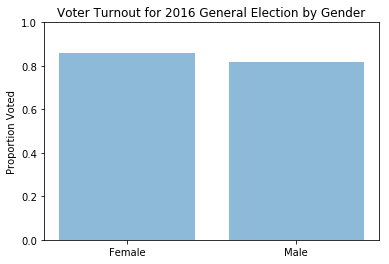

In [93]:
# Bar chart for gender on 2016 elections
objects = ('Female', 'Male')
x = np.arange(len(objects))

mean = df.groupby('female').GEN16.mean()
performance = (mean['F'], mean['M'])

plt.bar(x, performance, align='center', alpha=0.5)
plt.xticks(x, objects)
plt.ylabel('Proportion Voted')
plt.title('Voter Turnout for 2016 General Election by Gender')
plt.ylim((0,1))
 
plt.show()

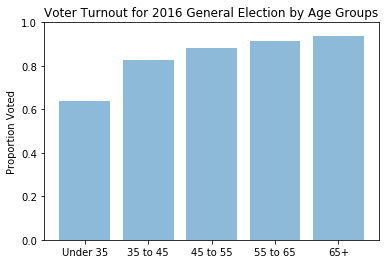

In [94]:
# Voting by age in 2016
age_groups = ('Under 35', '35 to 45', '45 to 55', '55 to 65', '65+')

out = pd.cut(df.age, bins=[0, 34, 45, 55, 65, 1000])
results = df.groupby(out).GEN16.mean()

plt.bar(np.arange(len(age_groups)), results, align='center', alpha=0.5)
plt.xticks(np.arange(len(age_groups)), age_groups)
plt.ylabel('Proportion Voted')
plt.title('Voter Turnout for 2016 General Election by Age Groups')
plt.ylim((0,1))
 
plt.show()

In [8]:
# Counts of votes for each type
df['typeofvote'].value_counts()

E    33691
Y    25994
A    23709
B      263
P       46
Name: typeofvote, dtype: int64

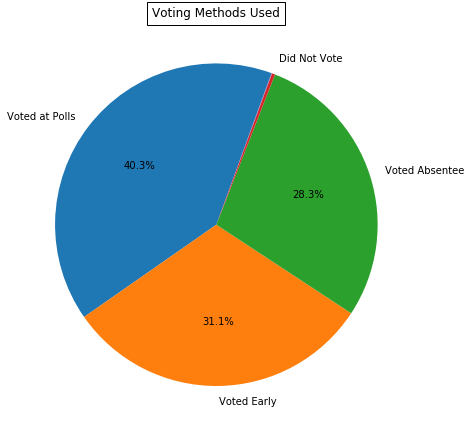

In [91]:
# Understand the breakdown of voting methods for registered voters in elections
figure(1, figsize=(7,7))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = 'Voted at Polls', 'Voted Early', 'Voted Absentee', 'Did Not Vote', '', ''

# Do not display the percentages of small values - these are votes that do not count
def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 1.5 else ''

df['typeofvote'].value_counts().plot.pie(labels=labels, autopct=my_autopct, startangle=70)
plt.title('Voting Methods Used', bbox={'facecolor':'1', 'pad':5})
plt.ylabel('')
plt.show()

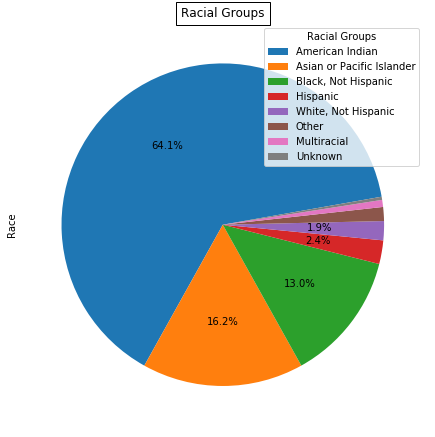

In [92]:
# Understand proportion of voter race
figure(1, figsize=(7,7))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = ['American Indian', 'Asian or Pacific Islander',
                                     'Black, Not Hispanic', 'Hispanic', 'White, Not Hispanic', 'Other',
                                    'Multiracial', 'Unknown']

# Do not display the percentages of small values - these are votes that do not count
def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 1.5 else ''

df['Race'].value_counts().plot.pie(labels=['','','','','','','',''], autopct=my_autopct, startangle=10)
plt.title('Racial Groups', bbox={'facecolor':'1', 'pad':5})

plt.legend(title="Racial Groups", loc="best", labels=labels)

plt.show()

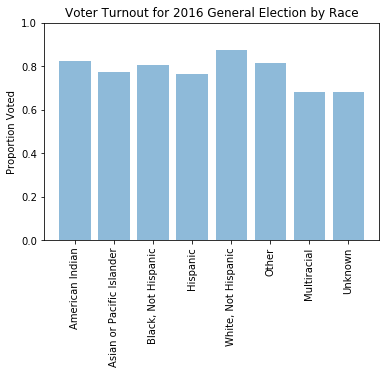

In [89]:
# Understanding voting differences by race
n = df.groupby('Race').GEN16.mean()

plt.bar(np.arange(len(n.index)), n, align='center', alpha=0.5)
plt.xticks(np.arange(len(n.index)), ['American Indian', 'Asian or Pacific Islander',
                                     'Black, Not Hispanic', 'Hispanic', 'White, Not Hispanic', 'Other',
                                    'Multiracial', 'Unknown'], rotation=90)
plt.ylabel('Proportion Voted')
plt.title('Voter Turnout for 2016 General Election by Race')
plt.ylim((0,1))

plt.show()

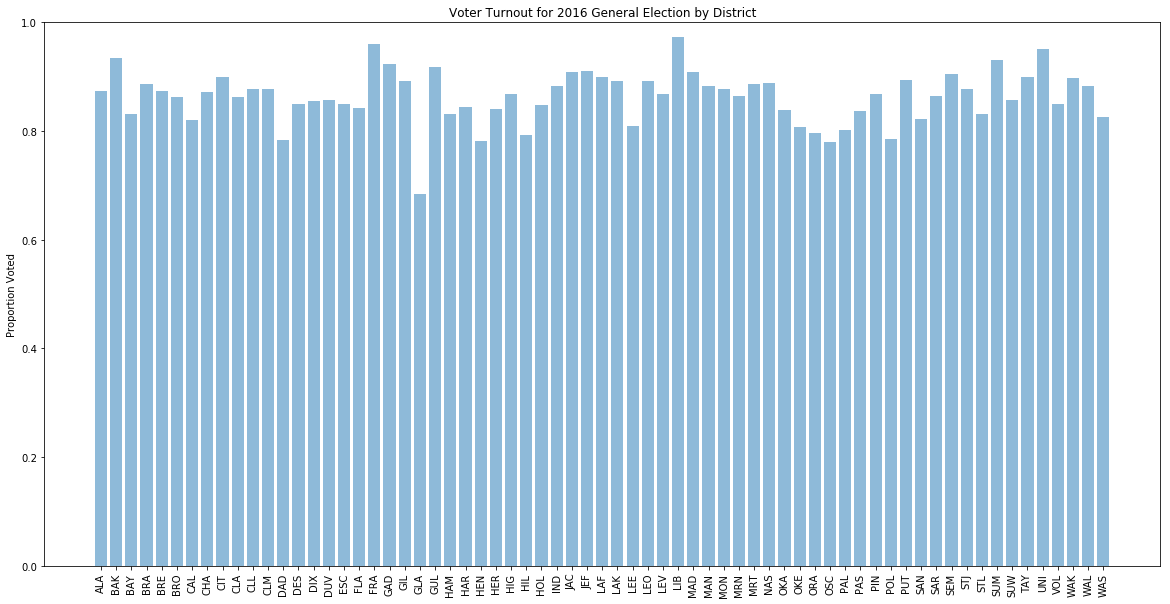

In [90]:
# Voter turnout by district in 2016
a = df.groupby('district').GEN16.mean()

fig = plt.subplots(figsize=(20, 10))
plt.bar(np.arange(len(a.index)), a, align='center', alpha=0.5)
plt.xticks(np.arange(len(a.index)), a.index, rotation=90)
plt.ylabel('Proportion Voted')
plt.title('Voter Turnout for 2016 General Election by District')
plt.ylim((0,1))

plt.show()